In [1116]:
import pandas as pd
import numpy as np
import array
import  math
from math import sqrt
import statistics
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median
from statistics import mode

from scipy.stats import skew
import collections
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import tqdm as notebook_tqdm
import hypertools as hyp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold, cross_val_score
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from joblib import Parallel, delayed
import joblib
import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
import PyQt5
from xgboost import plot_importance
%matplotlib inline
# from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [1085]:
# dfk1= pd.read_csv(r'E:\Ramesh\Vehicle data 3_mon DEC\K1\data-2023-03-20.10.36.csv')
# dfk2= pd.read_csv(r'E:\Ramesh\Vehicle data 3_mon DEC\K2\data-2023-03-20.10.33.csv')

# dfk4= pd.read_csv(r'E:\Ramesh\Vehicle data 3_mon DEC\K4\data-2023-03-20.10.31.csv')
# dfk5= pd.read_csv(r'E:\Ramesh\Vehicle data 3_mon DEC\K5\data-2023-03-20.10.32.csv')
# dfk6= pd.read_csv(r'E:\Ramesh\Vehicle data 3_mon DEC\K6\data-2023-03-20.10.34.csv')


In [1232]:
vehicle_vik2 =pd.read_csv(r"C:\Users\matuser3.MATTER\Downloads\IDC_2.csv")
new_df = vehicle_vik2.dropna()
speed_var=new_df.iloc[:,1].values 

       Front_Speed(X)  Front_Speed(Y)
0        45026.674884             0.0
1        45026.674885             0.0
2        45026.674885             0.0
3        45026.674885             0.0
4        45026.674886             0.0
...               ...             ...
22132    45026.680907             0.0
22133    45026.680907             0.0
22134    45026.680908             0.0
22135    45026.680908             0.0
22136    45026.680908             0.0

[22137 rows x 2 columns]


In [1087]:
# Data
# new_df =pd.read_csv(r"C:\Users\matuser3.MATTER\Downloads\vikas_data_agg\frontspeed_vikas.csv")
# new_df = new_df.dropna()
# print(new_df)
# speed_var=new_df.iloc[:,1].values 

        Front_Speed(X)  Front_Speed(Y)
0         4.050926e-07             0.0
1         5.034722e-06             0.0
2         1.776620e-05             0.0
3         1.892361e-05             0.0
4         2.008102e-05             0.0
...                ...             ...
147429    3.182497e-02             0.0
147430    3.182520e-02             0.0
147431    3.182543e-02             0.0
147432    3.182566e-02             0.0
147433    3.182589e-02             0.0

[147434 rows x 2 columns]


In [1233]:
df_speed= pd.DataFrame()
speed= []
for i in speed_var:
    if i ==0:
        pass
    else:
        speed.append(i) 
df_speed["speed"]=speed

In [1235]:
df_value = pd.DataFrame() #storing the feactures

In [1236]:
# windowing without overlap
tem1 = df_speed.iloc[:,0].values
j=0
leng =int(len(tem1)/10)

mean_x50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
    x = df_speed.iloc[j:i,0].values
    mean_x50[p] = mean(x)
    p=p+1
    j=i
df_value["mean_"] = mean_x50

# speed fec

In [1237]:
#Standard_deviation 
tem1 = df_speed.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
sdev_50=np.empty(leng,dtype=float)
p=0

for i in range(10,len(tem1),10):
    x = df_speed.iloc[j:i,0].values
    sdev_50[p] = np.std(x)
    p=p+1
    j=i
df_value["stdev_"] = sdev_50

In [1238]:
# fig = plt.figure()
# ax = fig.add_subplot(311)
# plt.plot(df_speed["speed"])
# ax1 = fig.add_subplot(312)
# plt.plot(df_value["mean_"])
# ax2 = fig.add_subplot(313)
# plt.plot(df_value["stdev_"])
# ax.get_shared_x_axes().join( ax1,ax2)

In [1239]:
#skewness mean
tem1 = df_speed.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
skew_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
  x = df_speed.iloc[j:i,0].values
  tem_skew= skew(x, axis=0, bias=True)

  if True==np.isnan(float(tem_skew)):
    skew_50[p]=mean(x)
  else:
    skew_50[p]= tem_skew

  p=p+1
  j=i
df_value["skewness_mean"] = skew_50

In [1240]:
#Peak to peak ratio
tem1 = df_speed.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
tem_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
  x = df_speed.iloc[j:i,0].values
  tem_max=max(x)
  tem_min=min(x)
  if tem_min==0:
    tem_50[p]=0
  else:
    tem_50[p] = tem_max/tem_min
  # print(tem_min/tem_max)
  p=p+1
  j=i
df_value["Peak to Peak Ratio(max min ratio)"] = tem_50

In [1241]:
# fig = plt.figure()
# ax = fig.add_subplot(511)
# plt.plot(df_speed["speed"])
# ax1 = fig.add_subplot(512)
# plt.plot(df_value["mean_"])
# ax2 = fig.add_subplot(513)
# plt.plot(df_value["stdev_"])
# ax3 = fig.add_subplot(514)
# plt.plot(df_value["Peak to Peak Ratio(max min ratio)"])
# # ax4 = fig.add_subplot(515)

# # plt.plot(df_value["skewness_mean"])
# ax4 = fig.add_subplot(515)
# plt.plot(df_value["acc_row_"])
# ax.get_shared_x_axes().join( ax1,ax2,ax3)

# Acc_

In [1242]:
acc_df = pd.DataFrame()
acc_df

""


In [1243]:
# inst. values
tem1 = df_speed.iloc[:,0].values
leng =int(len(tem1))
acc_row_=np.empty(leng,dtype=float)
p=0
for i in range(0,len(tem1)-2):
    v1 = df_speed.iloc[i:i+1,0].values  
    v2= df_speed.iloc[i+1:i+2,0].values
    acc_row_[p] = (v2-v1)/0.1
    p=p+1

acc_row_[p]=0
acc_df["acc_row_"] = acc_row_

In [1244]:
#Acc_mean
tem1 = acc_df.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
acc_mean_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
    x = acc_df.iloc[j:i,0].values
    acc_mean_50[p] = mean(x)
    p=p+1
    j=i
df_value["acc_mean"] = acc_mean_50

In [1245]:
#RMS_ACC
tem1 = acc_df.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
acc_rms_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
    x = acc_df.iloc[j:i,0].values
    acc_rms_50[p] = sqrt(mean(np.square(x)))
    p=p+1
    j=i
df_value["acc_rms"] = acc_rms_50

In [1246]:
#acc_standard_deviation
tem1 = acc_df.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
acc_sdev_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
    x = acc_df.iloc[j:i,0].values
    acc_sdev_50[p] = np.std(x)
    p=p+1
    j=i
df_value["acc_stdev"] = acc_sdev_50

In [1247]:
#acc_skewness mean
tem1 = acc_df.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
acc_skew_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
  x = acc_df.iloc[j:i,0].values
  acc_tem_skew= skew(x, axis=0, bias=True)

  if True==np.isnan(float(acc_tem_skew)):
    skew_50[p]=mean(x)
  else:
    skew_50[p]= acc_tem_skew

  p=p+1
  j=i
df_value["acc_skewness_mean"] = acc_skew_50

In [1249]:
#Acc. Peak to peak ratio
tem1 = acc_df.iloc[:,0].values
j=0
leng =int(len(tem1)/10)
acc_tem_50=np.empty(leng,dtype=float)
p=0
for i in range(10,len(tem1),10):
  x = acc_df.iloc[j:i,0].values
  acc_tem_max=max(x)
  acc_tem_min=min(x)
  if acc_tem_min==0:
    acc_tem_50[p]=0
  else:
    acc_tem_50[p] = acc_tem_max/acc_tem_min
  p=p+1
  j=i
df_value["Acc.Peak to Peak Ratio"] = acc_tem_50

# plot

In [908]:

# mean_= df_value.iloc[:,0].values
# plt.figure(figsize=(40,8))# (width,Hight)

# plt.plot(mean_)
# plt.title("mean")
# plt.show()

In [909]:
# rms= df_value.iloc[:,1].values
# plt.figure(figsize=(40,8))# (width,Hight)
# plt.plot(rms)
# plt.title("rms")
# plt.show()


In [910]:
# stdev= df_value.iloc[:,2].values
# plt.figure(figsize=(40,8))# (width,Hight)
# plt.plot(stdev)
# plt.title("stdev")
# plt.show()

In [911]:
#kurtosis_mean

# kurtosis_men= dfk150_value.iloc[:,3].values
# plt.figure(figsize=(40,8))# (width,Hight)
# plt.plot(kurtosis_men)
# plt.title("Kurtosis")
# plt.show()


In [912]:
# #skewness_mean	
# skewness_men= df_value.iloc[:,3].values
# plt.figure(figsize=(40,8))# (width,Hight)
# plt.plot(skewness_men)
# plt.title("skewness")
# plt.show()


In [913]:
# peak_ratio= df_value.iloc[:,4].values
# plt.figure(figsize=(40,8))# (width,Hight)
# plt.plot(peak_ratio)
# plt.title("Max Min Ratio")
# plt.show()


# PCA

In [1250]:
df_value.isna().sum()

mean_                                0
stdev_                               0
skewness_mean                        0
Peak to Peak Ratio(max min ratio)    0
acc_mean                             0
acc_rms                              0
acc_stdev                            0
acc_skewness_mean                    0
Acc.Peak to Peak Ratio               0
dtype: int64

In [1251]:
df_value=df_value.dropna()

In [1252]:
pca = PCA(.90)
x_pca = pca.fit_transform(df_value)
pca.explained_variance_ratio_

array([0.93007357])

In [1268]:
pca_df= pd.DataFrame(x_pca)
print(pca_df)


              0
0     28.635105
1     25.188886
2     22.811364
3     21.244064
4     20.118821
...         ...
1990  18.241123
1991  21.444565
1992  23.865549
1993  25.951140
1994  30.148445

[1995 rows x 1 columns]


In [1254]:
pca_df.isna().sum()

0    0
dtype: int64

# KNN

In [1136]:
scaler = MinMaxScaler()
model=scaler.fit(pca_df)
scaled_df=model.transform(pca_df)

In [1137]:
%matplotlib qt
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init ='k-means++', random_state= 42)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
  
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss(Within-Cluster-Sum-of-Squares)')

Text(0, 0.5, 'wcss(Within-Cluster-Sum-of-Squares)')

In [1138]:
SK = range(2,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(scaled_df).labels_
    score = metrics.silhouette_score(scaled_df,labels,metric="euclidean",sample_size=10,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(scaled_df,labels,metric="euclidean",sample_size=10,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7028072952665688
Silhouette score for k(clusters) = 3 is 0.6903282340778664
Silhouette score for k(clusters) = 4 is 0.5964480496254962
Silhouette score for k(clusters) = 5 is 0.4979937859109529
Silhouette score for k(clusters) = 6 is 0.3085009074485493
Silhouette score for k(clusters) = 7 is 0.4965754272669862
Silhouette score for k(clusters) = 8 is 0.38208875844782036
Silhouette score for k(clusters) = 9 is 0.45620572495866546
Silhouette score for k(clusters) = 10 is 0.45620572495866546
Silhouette score for k(clusters) = 11 is 0.45620572495866546
Silhouette score for k(clusters) = 12 is 0.45620572495866546


In [1170]:
kmeans= KMeans(n_clusters=3, init ='k-means++', random_state= 42)
kmeans_sel=kmeans.fit(scaled_df)
y_kmeans=kmeans.fit_predict(scaled_df)

In [1171]:
pca_df["lebel"]= y_kmeans

In [1182]:
df_1 =pd.DataFrame(scaled_df)
df_1["lebel"]= y_kmeans
scaled_df = np.array(df_1)

In [1184]:
scaled_df

array([[0.02102416, 2.        ],
       [0.01459   , 2.        ],
       [0.02675661, 2.        ],
       ...,
       [0.02067558, 2.        ],
       [0.0163172 , 2.        ],
       [0.01086731, 2.        ]])

In [1185]:
labels=pd.DataFrame(kmeans_sel.labels_)
dfk_lebels =pca_df.assign(Cluster=labels)

group_km =dfk_lebels.groupby(['Cluster']).mean().round(1)
group_km

,0,lebel
Cluster,,
0,0.4,0
1,30.8,1
2,-24.8,2


In [1186]:
class_labels = dfk_lebels.pop('Cluster')

In [1187]:
geo = hyp.plot(dfk_lebels, '.', group=class_labels, legend=list(set(class_labels)))

c:\Users\matuser3.MATTER\AppData\Local\Programs\Python\Python37\lib\site-packages\hypertools\plot\plot.py:249: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
c:\Users\matuser3.MATTER\AppData\Local\Programs\Python\Python37\lib\site-packages\hypertools\plot\plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


In [1188]:
plt.scatter(scaled_df[y_kmeans==0,0],scaled_df[y_kmeans==0,1],s = 10,c = 'red',label='Cluster 1(mean)')
plt.scatter(scaled_df[y_kmeans==1,0],scaled_df[y_kmeans==1,1],s = 10,c ='blue',label='Cluster 2(rms)')
plt.scatter(scaled_df[y_kmeans==2,0],scaled_df[y_kmeans==2,1],s = 10,c ='green',label='Cluster 3')


# # plt.scatter(scaled_df[y_kmeans==3,0],scaled_df[y_kmeans==3,1],s = 10,c ='cyan',label='Cluster 4')
# # plt.scatter(scaled_df[y_kmeans==4,0],scaled_df[y_kmeans==4,1],s = 10,c ='magenta',label='Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label = 'Centroids')
# plt.legend()
plt.show()

# Data splitting

In [1189]:
pca_df

,0,lebel
0,-33.559049,2
1,-34.125436,2
2,-33.054431,2
3,-31.919399,2
4,-31.651261,2
...,...,...
5198,-33.060729,2
5199,-33.379769,2
5200,-33.589733,2
5201,-33.973393,2


In [1193]:
x_vali = pca_df.iloc[0:521,0].values
x_vali =x_vali.reshape(-1, 1)
y_vali = pca_df.iloc[0:521,1].values

x= pca_df.iloc[521:,0].values
y= pca_df.iloc[521:,1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
x_train =x_train.reshape(-1, 1)
x_test= x_test.reshape(-1, 1)

# Random forest

In [1195]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train,y_train)

y_pred = clf.predict(x_vali)

print("accuracy of the test: ", metrics.accuracy_score(y_vali, y_pred))

# y_vali_pred = clf.predict(x_vali)
# print("accuracy of the validation : ", metrics.accuracy_score(y_vali, y_vali_pred))

accuracy of the test:  1.0


In [1196]:
confusion_matrix(y_vali, y_pred)

array([[161,   0,   0],
       [  0,  87,   0],
       [  0,   0, 273]], dtype=int64)

In [1198]:
from sklearn.metrics import classification_report
print(classification_report(y_vali, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       273

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521



In [1214]:
# save the model
joblib.dump(clf,'RF_clf.pkl')
loaded_Rf_clf= joblib.load('RF_clf.pkl')

In [946]:
#decision tree
# cross_val_score(RandomForestClassifier(n_estimators=100),x,y,cv=5)

# XGBoost (eXtreme Gradient Boosting)

In [1199]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# y_pred_xg = xgb_model.predict(x_test)
# print("accuracy of the test :",metrics.accuracy_score(y_test,y_pred_xg))

y_test_pred_xgb = xgb_model.predict(x_test)
print("accuracy of the validation :",metrics.accuracy_score(y_test,y_test_pred_xgb))

accuracy of the validation : 0.997867803837953


In [1200]:
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.99      1.00      1.00       160
           2       1.00      1.00      1.00       175

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469



In [1212]:
# save the model
joblib.dump(xgb_model,'XG_clf.pkl')
loaded_xgb_model= joblib.load('XG_clf.pkl')

In [953]:
# k-fold
# n_folds= 5

# kf = KFold(n_splits=n_folds, shuffle=True)
# cross_val_score(xgb_model,x,y,cv=kf)


In [1277]:
20000*0.1/(60*60)

0.5555555555555556

# K-nearest neighbor

In [1202]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(x_train, y_train)
y_pred_knn = knn_clf.predict(x_test)

# print("accuracy of the test :",metrics.accuracy_score(y_test,y_pred_knn))

y_vali_pred_knn = knn_clf.predict(x_vali)
print("accuracy of the validation :",metrics.accuracy_score(y_vali,y_vali_pred_knn))


accuracy of the validation : 1.0


In [1203]:
print(classification_report(y_vali, y_vali_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       273

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521



In [1204]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[133,   1,   0],
       [  0, 160,   0],
       [  0,   0, 175]], dtype=int64)

In [1211]:
# save the model
joblib.dump(knn_clf,'knn_clf.pkl')
loaded_knn_clf= joblib.load('knn_clf.pkl')

In [958]:
# #k-fold
# n_folds= 5
# kf = KFold(n_splits=n_folds, shuffle=True)
# cross_val_score(knn_clf,x,y,cv=kf)


# test samples

In [1263]:
x= pca_df.iloc[:,0].values
x

array([28.63510537, 25.18888596, 22.81136401, ..., 23.86554947,
       25.95113988, 30.1484451 ])

In [1215]:
#Test

# this is for test 1
dfk4=dfk4.dropna()
dfk4
speed_test=dfk4.iloc[11:21,2].values
# plt.plot(speed_test)

mean1 =mean(speed_test)
stdev1= np.std(speed_test)
skew1= skew(speed_test, axis=0, bias=True)
ppr1 = 0 #max(speed_test)/min(speed_test) bez its Inf
print(mean1,stdev1,skew1,ppr1)

tem1 = vehicle_vik2.iloc[438:449,1].values
leng =int(len(tem1))
acc_row_=np.empty(leng,dtype=float)
p=0
for i in range(438,len(tem1)):
    v1 = vehicle_vik2.iloc[i:i+1,2].values  
    v2=  vehicle_vik2.iloc[i+1:i+2,2].values
    acc_row_[p] = (v2-v1)/0.1
    p=p+1

mean_acc =mean(acc_row_)
rms_acc = sqrt(mean(np.square(acc_row_)))
std_acc = np.std(acc_row_)
skew_acc= skew(acc_row_, axis=0, bias=True)
ppr_acc =max(acc_row_)/min(acc_row_)
test_data1= array.array('d',[mean1,stdev1,skew1,ppr1,mean_acc,rms_acc,std_acc,skew_acc,ppr_acc])

40.9 1.0440306508910548 -0.3268911725708844 0


In [1216]:
test_data1

array('d', [40.9, 1.0440306508910548, -0.3268911725708844, 0.0, 1.0, 1.2747548783981961, 0.7905694150420949, 0.0, -9.0])

In [1220]:
#this is for test 2
vehicle_vik2 =pd.read_csv(r"C:\Users\matuser3.MATTER\Downloads\IDC_2.csv")
speed_test =vehicle_vik2.iloc[438:449,1].values



mean1 =mean(speed_test)
stdev1= np.std(speed_test)
skew1= skew(speed_test, axis=0, bias=True)
ppr1 = 0 #max(speed_test)/min(speed_test) bez its Inf

tem1 = vehicle_vik2.iloc[438:449,1].values
leng =int(len(tem1))
acc_row_=np.empty(leng,dtype=float)
p=0
for i in range(438,len(tem1)):
    v1 = vehicle_vik2.iloc[i:i+1,2].values  
    v2=  vehicle_vik2.iloc[i+1:i+2,2].values
    acc_row_[p] = (v2-v1)/0.1
    p=p+1

mean_acc =mean(acc_row_)
rms_acc = sqrt(mean(np.square(acc_row_)))
std_acc = np.std(acc_row_)
skew_acc= skew(acc_row_, axis=0, bias=True)
ppr_acc =max(acc_row_)/min(acc_row_)
test_data2= array.array('d',[mean1,stdev1,skew1,ppr1,mean_acc,rms_acc,std_acc,skew_acc,ppr_acc])
test_data2

array('d', [7.721590909090909, 2.52745066104331, -2.5079040119698917, 0.0, -40.49104351609457, 138.82980779815463, 132.7937910003713, -2.8451101393305422, -0.011215515991949915])

In [1228]:
pca = PCA(.90)
test1_pca = pca.fit_transform([test_data1])
test2_pca = pca.fit_transform([test_data2])



In [1226]:
manu_test1 =-30
manu_test = 30


In [ ]:
tem_x =[]
for i in x:
    y_pred = loaded_Rf_clf.predict([[i]])
    print(y_pred)
    tem_x.append(y_pred)
    # y_xgb = loaded_xgb_model.predict([[x]])
    # print(y_xgb)
    # y_knn = loaded_knn_clf.predict([[x]])
    # print(y_knn)

In [1273]:
pca_df["label by RF "] =tem_x
pca_df.to_csv('IDC_pca file.csv')

In [1282]:
df_value

,mean_,stdev_,skewness_mean,Peak to Peak Ratio(max min ratio),acc_mean,acc_rms,acc_stdev,acc_skewness_mean,Acc.Peak to Peak Ratio
0,8.493750,0.684311,-0.146293,1.282443,2.30625,2.656287,1.317980,1.380678e-311,0.000000
1,11.435625,1.082590,-0.051522,1.343023,3.60000,4.845342,3.243045,1.380901e-311,0.000000
2,14.236875,0.552540,-0.373541,1.122881,1.63125,2.715192,2.170550,2.500437e+00,-1.600000
3,15.766875,0.556307,0.042637,1.120755,1.57500,3.029155,2.587500,1.575000e+00,-2.500000
4,16.661250,0.352899,0.109243,1.076923,0.56250,3.831612,3.790098,7.203515e-01,-2.000000
...,...,...,...,...,...,...,...,...,...
1990,18.793125,0.705461,-0.495924,1.108280,-2.58750,3.476596,2.321974,1.450552e+00,-0.076923
1991,15.547500,0.995546,0.085724,1.212851,-2.81250,3.494751,2.074398,1.814880e+00,-0.300000
1992,12.988125,0.779606,0.228722,1.194313,-2.47500,3.645417,2.676460,1.418571e+00,-0.214286
1993,10.479375,1.232902,-0.513298,1.445946,-3.93750,5.418718,3.722713,1.130611e+00,-0.285714


In [1283]:
fig = plt.figure()
ax = fig.add_subplot(411)
plt.plot(speed_var)
ax1 = fig.add_subplot(412)
plt.plot(df_value["acc_mean"])
ax2 = fig.add_subplot(413)
plt.plot(df_value["mean_"])
ax3 = fig.add_subplot(414)
plt.plot(pca_df["label by RF "] )
# ax.get_shared_x_axes().join( ax,ax1)
ax.get_shared_x_axes().join(ax1, ax2,ax3)

In [1285]:
df_value.to_csv('abc.csv')

In [1229]:
y_pred = clf.predict([[manu_test]])
print(y_pred)
y_xgb = xgb_model.predict([[manu_test]])
print(y_xgb)
y_knn = knn_clf.predict([[manu_test]])
print(y_knn)

[1]
[1]
[1]


In [1230]:
y_pred = clf.predict(test2_pca)
print(y_pred)
y_xgb = xgb_model.predict(test2_pca)
print(y_xgb)
y_knn = knn_clf.predict(test2_pca)
print(y_knn)

[0]
[0]
[0]


In [1294]:
df_imp = pd.read_csv(r"C:\Users\matuser3.MATTER\Desktop\imfs\abc.csv")
X = df_imp.iloc[:,0:9].values
Y = df_imp.iloc[:,9].values

In [1293]:
df_imp

,mean_,stdev_,skewness_mean,Peak to Peak Ratio(max min ratio),acc_mean,acc_rms,acc_stdev,acc_skewness_mean,Acc.Peak to Peak Ratio,Unnamed: 9
0,8.493750,0.684311,-0.146293,1.282443,2.30625,2.656287,1.317980,1.380678e-311,0.000000,1
1,11.435625,1.082590,-0.051522,1.343023,3.60000,4.845342,3.243045,1.380901e-311,0.000000,1
2,14.236875,0.552540,-0.373541,1.122881,1.63125,2.715192,2.170550,2.500437e+00,-1.600000,1
3,15.766875,0.556307,0.042637,1.120755,1.57500,3.029155,2.587500,1.575000e+00,-2.500000,1
4,16.661250,0.352899,0.109243,1.076923,0.56250,3.831612,3.790098,7.203515e-01,-2.000000,1
...,...,...,...,...,...,...,...,...,...,...
1990,18.793125,0.705461,-0.495924,1.108280,-2.58750,3.476596,2.321974,1.450552e+00,-0.076923,1
1991,15.547500,0.995546,0.085724,1.212851,-2.81250,3.494751,2.074398,1.814880e+00,-0.300000,1
1992,12.988125,0.779606,0.228722,1.194313,-2.47500,3.645417,2.676460,1.418571e+00,-0.214286,1
1993,10.479375,1.232902,-0.513298,1.445946,-3.93750,5.418718,3.722713,1.130611e+00,-0.285714,1


In [1298]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(X, Y)
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.99234
Feature: 1, Score: 0.00068
Feature: 2, Score: 0.00035
Feature: 3, Score: 0.00012
Feature: 4, Score: 0.00020
Feature: 5, Score: 0.00289
Feature: 6, Score: 0.00303
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.00022


In [1299]:
model = RandomForestClassifier()
model.fit(X, Y)
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.60397
Feature: 1, Score: 0.08309
Feature: 2, Score: 0.00283
Feature: 3, Score: 0.05385
Feature: 4, Score: 0.00512
Feature: 5, Score: 0.09923
Feature: 6, Score: 0.12951
Feature: 7, Score: 0.01808
Feature: 8, Score: 0.00431


In [1312]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_,end = " ")

[0.56796744 0.063426   0.01236167 0.05427201 0.01411298 0.10714222
 0.13430626 0.03353586 0.01287556] 

# Knn

In [338]:
# kmeans = KMeans(
# init="random",
# n_clusters=3,
# n_init=10,
# max_iter=300,
# random_state=42
# )

In [339]:
# plt.plot(dfk150_value.loc[:,'acc_skewness_50_mean'])

In [340]:
# df_new=dfk150_value.drop(['acc_skewness_50_mean'], axis=1)

In [341]:
# scaler = MinMaxScaler()
# model=scaler.fit(df_new)
# scaled_df=model.transform(df_new)

In [342]:
# scaled_df = StandardScaler().fit_transform(df_new)
# # %matplotlib qt
# plt.plot(scaled_df)

In [343]:
# scale=pd.DataFrame(scaled_df)
# scale

In [344]:
# mean__=np.mean(scale.iloc[:,0].values)

In [345]:
# mean__

In [346]:
# scaler = MinMaxScaler()
# model=scaler.fit(dfk150_value)
# scaled_df=model.transform(dfk150_value)

In [347]:
# from sklearn.cluster import KMeans
# wcss= []
# for i in range(1,11):
#   kmeans= KMeans(n_clusters=i, init ='k-means++', random_state= 42)
#   kmeans.fit(scaled_df)
#   wcss.append(kmeans.inertia_)
  
# plt.plot(range(1,11),wcss)
# plt.title('the elbow method')
# plt.xlabel('number of clusters')
# plt.ylabel('wcss(Within-Cluster-Sum-of-Squares)')
# plt.show()

In [348]:
# from sklearn.cluster import KMeans
# wcss= []

# kmeans= KMeans(n_clusters=3, init ='k-means++', random_state= 42)
# y_kmeans=kmeans.fit_predict(scaled_df)

In [349]:
# plt.scatter((a,a,a,a,a),scaled_df[y_kmeans==0,:],s = 10,c = 'red',label='Cluster 1(mean)')
# plt.scatter((b,b,b,b,b),scaled_df[y_kmeans==1,:],s = 10,c ='blue',label='Cluster 2(rms)')
# # plt.scatter(scaled_df[y_kmeans==2,],scaled_df[y_kmeans==2,2],s = 10,c ='green',label='Cluster 3')


# # plt.scatter(scaled_df[y_kmeans==3,0],scaled_df[y_kmeans==3,1],s = 10,c ='cyan',label='Cluster 4')
# # plt.scatter(scaled_df[y_kmeans==4,0],scaled_df[y_kmeans==4,1],s = 10,c ='magenta',label='Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label = 'Centroids')
# plt.legend()
# plt.show()

In [350]:
# len(scaled_df[y_kmeans==2,12])

In [351]:
# kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

# #fit k-means algorithm to data
# kmeans.fit(scaled_df)

In [352]:
# kmeans.inertia_
# kmeans.cluster_centers_
# kmeans.n_iter_
# kmeans.labels_[:222]

In [353]:
# kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
# # A list holds the SSE values for each k
# sse = []
# for k in range(1, 11):
#   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#   kmeans.fit(scaled_df)
#   sse.append(kmeans.inertia_)

In [358]:
# plt.style.use("fivethirtyeight")
# plt.plot(range(1, 11), sse)
# plt.xticks(range(1, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

## 20%

In [355]:
dfk120_value = pd.DataFrame()
dfk120_value

""


In [356]:
print(p)

5203


In [ ]:
# 20% overlape
tem1 = dfk1.iloc[:,1].values
j=0
# leng =int(len(tem1)/110-1)
mean_x20=np.empty(789,dtype=float)
p=0
for i in range(550,len(tem1),440):
    print("j",j)

    x = dfk1.iloc[j:i,2].values
    mean_x20[p] = mean(x)
    p=p+1
    j=i-110

    print('i',i,"mean_x20",mean_x20[p-1])
dfk120_value["mean_20%"] = mean_x20



In [ ]:
347700-347270

430

In [ ]:
k120_value = dfk120_value.iloc[:, :].values
print(len(k120_value))

789


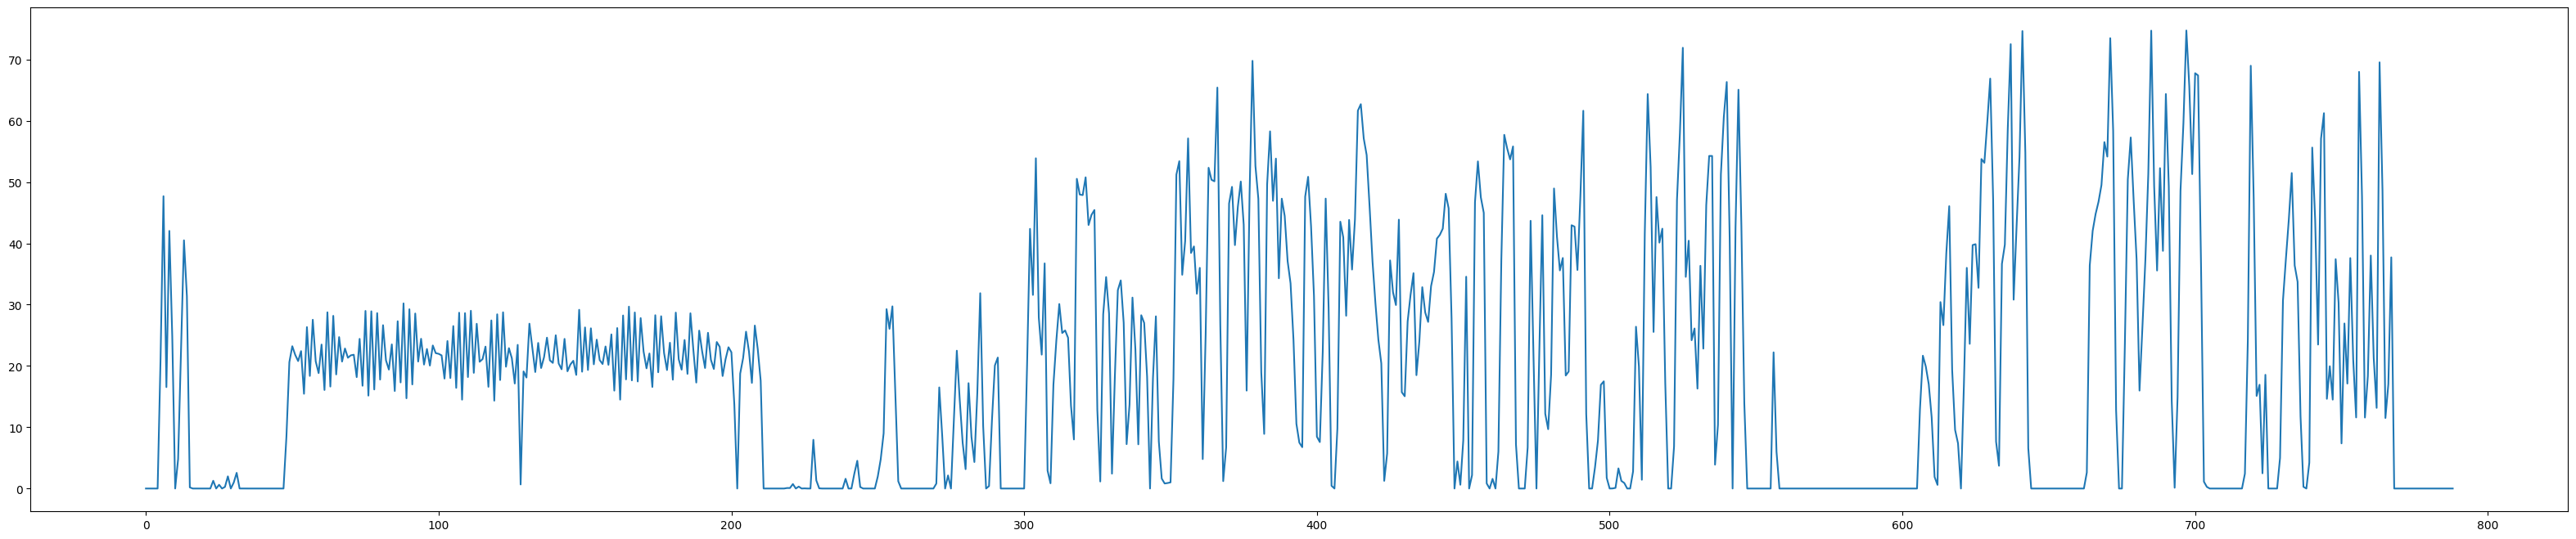

In [ ]:
speedzoom120 =dfk120_value.iloc[:,0].values
plt.figure(figsize=(40,8))# (width,Hight)
plt.plot(speedzoom120)
plt.show()


# 30%

In [ ]:
dfk130_value = pd.DataFrame()
dfk130_value

""


In [ ]:
550*30

16500

In [ ]:
550-165

385

In [ ]:
p

768

In [ ]:
# 30 overlape
tem1 = dfk1.iloc[:,1].values
j=0
# leng =int(len(tem1)/110-1)
mean_x30=np.empty(902,dtype=float)
p=0
for i in range(550,len(tem1),385):
    print("j",j)

    x = dfk1.iloc[j:i,2].values
    mean_x30[p] = mean(x)
    p=p+1
    j=i-165

    print('i',i,"mean_x30",mean_x30[p-1])
dfk130_value["mean_30%"] = mean_x30


j 0
i 550 mean_x30 0.0
j 385
i 935 mean_x30 0.0
j 770
i 1320 mean_x30 0.0
j 1155
i 1705 mean_x30 0.0
j 1540
i 2090 mean_x30 0.0
j 1925
i 2475 mean_x30 3.8254545454545457
j 2310
i 2860 mean_x30 29.78
j 2695
i 3245 mean_x30 47.04
j 3080
i 3630 mean_x30 16.547272727272727
j 3465
i 4015 mean_x30 36.732727272727274
j 3850
i 4400 mean_x30 34.11818181818182
j 4235
i 4785 mean_x30 0.0
j 4620
i 5170 mean_x30 0.16
j 5005
i 5555 mean_x30 10.58
j 5390
i 5940 mean_x30 27.28
j 5775
i 6325 mean_x30 42.74727272727273
j 6160
i 6710 mean_x30 31.36
j 6545
i 7095 mean_x30 0.66
j 6930
i 7480 mean_x30 0.0
j 7315
i 7865 mean_x30 0.0
j 7700
i 8250 mean_x30 0.0
j 8085
i 8635 mean_x30 0.0
j 8470
i 9020 mean_x30 0.0
j 8855
i 9405 mean_x30 0.0
j 9240
i 9790 mean_x30 0.0
j 9625
i 10175 mean_x30 0.0
j 10010
i 10560 mean_x30 1.2636363636363637
j 10395
i 10945 mean_x30 0.3509090909090909
j 10780
i 11330 mean_x30 0.6127272727272727
j 11165
i 11715 mean_x30 0.6127272727272727
j 11550
i 12100 mean_x30 0.0
j 11935
i 1248

In [ ]:
dfk130_value

,mean_30%
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
897,0.0
898,0.0
899,0.0
900,0.0


In [ ]:
speedzoom130 =dfk130_value.iloc[:,0].values
plt.figure(figsize=(40,8))# (width,Hight)
plt.plot(speedzoom130)
plt.show()
